# Credit card: Clustering


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cluster

For active credit card holders during the last 6 months: 
- id: id of credit card holder
- purchase: amount of purchases made from account
- cash_adv: cash in advance
- credit_limit: limit of credit card for user
- payment: amount of the last payment by user
- pct_fullpay: percent of full payment by user
- tenure: tenure of credit card service for user

In [2]:
df = pd.read_csv('Credit card.csv')
df.head()

,id,purchase,cash_adv,credit_limit,payment,pct_fullpay,tenure
0,1,95.40,0.000000,1000.0,201.802084,0.000000,12
1,2,0.00,6442.945483,7000.0,4103.032597,0.222222,12
2,3,773.17,0.000000,7500.0,622.066742,0.000000,12
3,4,1499.00,205.788017,7500.0,0.000000,0.000000,12
4,5,16.00,0.000000,1200.0,678.334763,0.000000,12


## 1. Standardize the variables. Determine the number of clusters using the elbow method. 

In [3]:
col = df[['purchase', 'cash_adv', 'credit_limit', 'payment', 'pct_fullpay', 'tenure']]
for c in col:
    df['z_'+c] = (df[c] - df[c].mean())/df[c].std()
      
df.head()

,id,purchase,cash_adv,credit_limit,payment,pct_fullpay,tenure,z_purchase,z_cash_adv,z_credit_limit,z_payment,z_pct_fullpay,z_tenure
0,1,95.40,0.000000,1000.0,201.802084,0.000000,12,-0.424876,-0.466759,-0.960325,-0.528949,-0.525522,0.360659
1,2,0.00,6442.945483,7000.0,4103.032597,0.222222,12,-0.469526,2.605459,0.688640,0.818596,0.234214,0.360659
2,3,773.17,0.000000,7500.0,622.066742,0.000000,12,-0.107662,-0.466759,0.826054,-0.383783,-0.525522,0.360659
3,4,1499.00,205.788017,7500.0,0.000000,0.000000,12,0.232045,-0.368633,0.826054,-0.598655,-0.525522,0.360659
4,5,16.00,0.000000,1200.0,678.334763,0.000000,12,-0.462037,-0.466759,-0.905359,-0.364347,-0.525522,0.360659


/Users/breannejones/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/breannejones/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/breannejones/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/breannejones/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

Text(0, 0.5, 'Sum of Squared Errors')

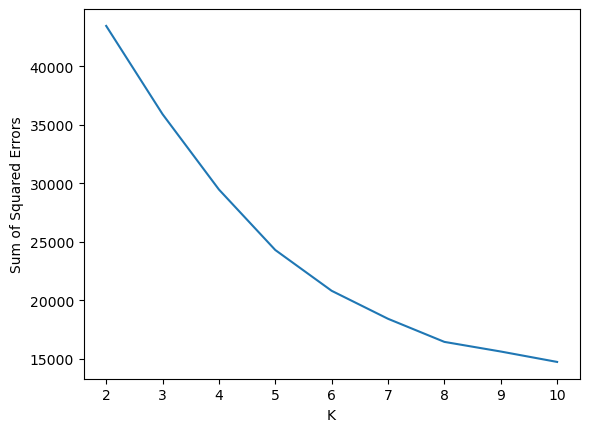

In [4]:
ss = []
krange = range(2,11)
x = df[['z_purchase', 'z_cash_adv', 'z_credit_limit', 'z_payment', 'z_pct_fullpay', 'z_tenure']]
for i in krange:
    m = cluster.KMeans(n_clusters=i).fit(x)
    error = m.inertia_
    ss.append(error)

plt.plot(krange, ss)
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')

## 2. Conduct k-means clustering using the best number of clusters you decided. Add predicted cluster labels to the data and report the number of customers in each cluster.

In [9]:
m = cluster.KMeans(n_clusters=5, random_state=10).fit(df[['z_purchase', 'z_cash_adv', 'z_credit_limit', 'z_payment', 'z_pct_fullpay', 'z_tenure']])
df['cluster'] = m.labels_
df.head()

/Users/breannejones/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id,purchase,cash_adv,credit_limit,payment,pct_fullpay,tenure,z_purchase,z_cash_adv,z_credit_limit,z_payment,z_pct_fullpay,z_tenure,cluster
0,1,95.40,0.000000,1000.0,201.802084,0.000000,12,-0.424876,-0.466759,-0.960325,-0.528949,-0.525522,0.360659,3
1,2,0.00,6442.945483,7000.0,4103.032597,0.222222,12,-0.469526,2.605459,0.688640,0.818596,0.234214,0.360659,2
2,3,773.17,0.000000,7500.0,622.066742,0.000000,12,-0.107662,-0.466759,0.826054,-0.383783,-0.525522,0.360659,3
3,4,1499.00,205.788017,7500.0,0.000000,0.000000,12,0.232045,-0.368633,0.826054,-0.598655,-0.525522,0.360659,3
4,5,16.00,0.000000,1200.0,678.334763,0.000000,12,-0.462037,-0.466759,-0.905359,-0.364347,-0.525522,0.360659,3


In [10]:
df.groupby('cluster').count()

,id,purchase,cash_adv,credit_limit,payment,pct_fullpay,tenure,z_purchase,z_cash_adv,z_credit_limit,z_payment,z_pct_fullpay,z_tenure
cluster,,,,,,,,,,,,,
0,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195
1,717,717,717,717,717,717,717,717,717,717,717,717,717
2,1673,1673,1673,1673,1673,1673,1673,1673,1673,1673,1673,1673,1673
3,5244,5244,5244,5244,5244,5244,5244,5244,5244,5244,5244,5244,5244
4,121,121,121,121,121,121,121,121,121,121,121,121,121


## 3. Report the average values for the variables used by cluster and describe each cluster.

In [11]:
df.groupby('cluster').mean()

,id,purchase,cash_adv,credit_limit,payment,pct_fullpay,tenure,z_purchase,z_cash_adv,z_credit_limit,z_payment,z_pct_fullpay,z_tenure
cluster,,,,,,,,,,,,,
0,4585.801674,1524.285331,84.179093,4963.751363,1752.382279,0.793833,11.828452,0.243879,-0.426620,0.129023,0.006645,2.188444,0.232479
1,5996.281729,435.504393,1255.997186,2636.057648,643.973582,0.144067,7.369596,-0.265698,0.132143,-0.510691,-0.376216,-0.032984,-3.099176
2,3365.043036,1468.874351,2862.061895,9069.847308,3410.122152,0.042633,11.867902,0.217945,0.897970,1.257491,0.579254,-0.379767,0.261956
3,4644.182113,577.711276,443.041592,2996.212314,954.463693,0.040175,11.894546,-0.199142,-0.255502,-0.411711,-0.268968,-0.388169,0.281864
4,2417.768595,11222.817521,5357.130592,12529.752066,18557.600229,0.345578,11.826446,4.783041,2.087705,2.208368,5.811429,0.655946,0.230980


**Cluster 1:** Mid level purchases, the smallest cash advances, mid level credit limit, mid to low level payments, and very high percentage of full payments. I would call this cluster the Responsible Spender Cluster.

**Cluster 2:** Low level purchaes, mid level cash advances, the lowest credit limit and payments, mid to low level percentage of full payment, and the lowest tenure. I would call this cluster the New User, Low Spender Cluster.

**Cluster 3:** Mid level purchases, high to mid level cash advance, high credit limit, high payment, very low percentage of full payments. I would call this cluster the Irresponsible Big Spender Cluster.

**Cluster 4:** Low level purchases, low level cash advance, low level credit limit, low level payment, and low percentage of full payments. I would call this cluster the Small Spender Cluster.

**Cluster 5:** High level purchase, high level cash advance, high level credit limit, high level payment, high to mid level of full payment. I would call this cluster the Big Spender Cluster.